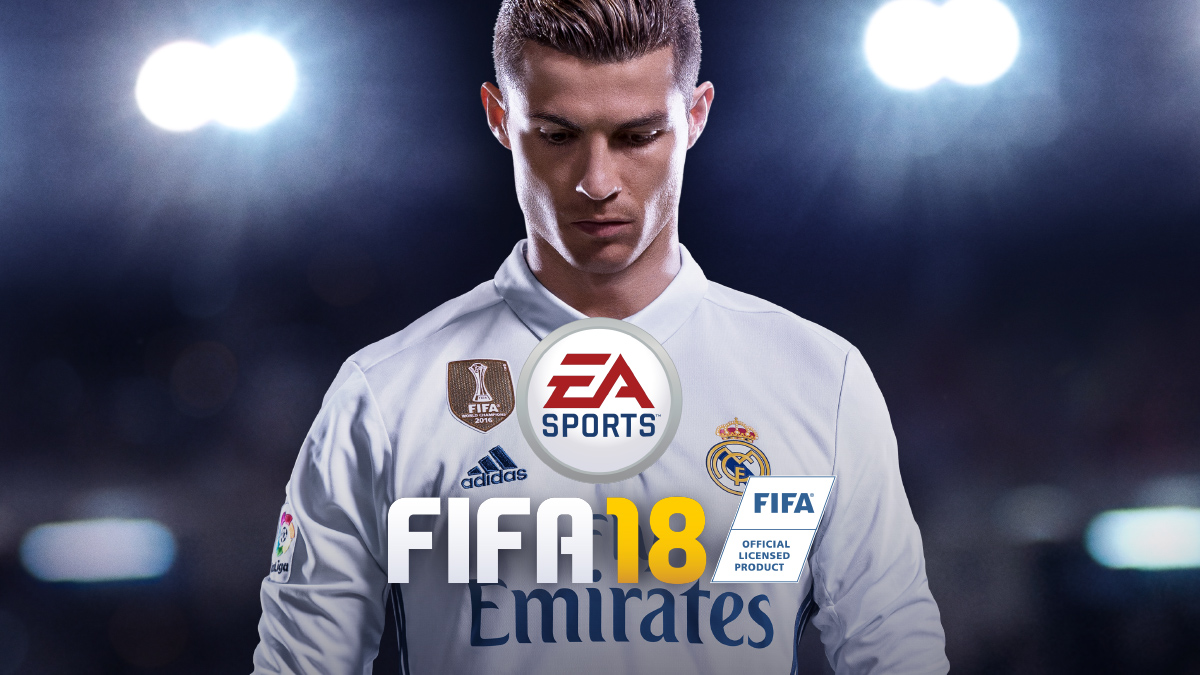

#  FIFA18 Purchase Prediction 




**Purpose**:  The goal of the project was to predict the purchase of the of the customer based on his spending/puchases/past history of purchases and spending/logins behavior using **recency, frequency, and monetary values**  features generated from feature engineering.


**Business Benefit**: Knowing the probablity that customer is expected to make a purchase is critical for strategic marketing. If a customer doesn’t make a purchase within the expected timeframe, the marketing team can target him with an incentive to increase the likelihood that he will make a purchase.



**Data Set and Data Engineering/Feature Extraction Information**:The dataset given was player logins,purchases,spend and sample which conatined information about player logins ,his purchases,his spends on various games across genres.We divided the games into generes.






**Value,Genre & Variable Descriptions:**




| Values               |     Description                                    	                                             | 
|----------------------|-------------------------------------------------------------------------------------------------|
|**RECENCY**              | Calculated average no. of days of the purchase made by the user across any combined genre       |      
|**MONETARY**             | Calculated the monetary value(50units for purchase) and (10units for spending)across each genre 
|
|**FREQUENCY**             | Calculated the number of times the user has logged in/played/accessed  across each genre        |                           	
                                                                                                                                                             





| Genre       	            | Games                                  	                      |
|---------------------------|-----------------------------------------------------------------|
|**Sports**           	    | FIFA , MADDEN , NFL ,NBA ,PGA series.                           |
|**Shooting**               | Battlefield 1,4, Hardline, TITANFALL series                     |
|**Action**          	    | NFS,Mirrors edge series                                         |
|**Fighting**               | UFC series                                                      |
|**RolePlaying/Other**      | Plant vs zombies, Dragons Age, Mass Effect.                     |
   
    
| Variable          	| Description                                    	                      |
|-------------------	|-------------------------------------------------------------------------|
| id          	        | Unique User ID                                 	                      |
| ShooterFreq           | No. of times user has played/logged in shooter genre games.             |
| SportsFreq           	| No. of times user has played/logged in sports genre games.              |
| ActionFreq        	| No. of times user has played/logged in action genre games.              |
| FightFreq         	| No. of times user has played/logged in sports genre games.	          |
| OtherRoleFreq     	| No. of times user has played/logged in RolePlaying/Other genre games	  |
| ActionMoney         	| Monetary value spend on action type genre games.                        |
| FightMoney          	| Monetary value spend on Fight type genre games.                         |
| SportsMoney        	| Monetary value spend on Sports type genre games.                        |
| ShooterMoney       	| Monetary value spend on Shooter type genre games.                       |
| OtherRoleMoney    	| Monetary value spend on RolePlaying/other type genre games.             |
| Recency    	        | Average value of the recent puchase made across any genre of the game.  |
| Fifa18purchase       	| Target variable whether puchased or not (1/0)                           |

In [3]:
#Importing libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
a=pd.read_csv(r"EA2.csv")

In [4]:
#Replacing nan values with 0.
a= a.replace(np.nan, 0)

In [5]:
#Dataset description with datatype.
a.info()
a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   object 
 1   ShooterFreq     5000 non-null   object 
 2   SportsFreq      5000 non-null   object 
 3   ActionFreq      5000 non-null   object 
 4   FightFreq       5000 non-null   object 
 5   OtherRoleFreq   5000 non-null   object 
 6   ActionMoney     5000 non-null   float64
 7   FightMoney      5000 non-null   float64
 8   SportsMoney     5000 non-null   float64
 9   ShooterMoney    5000 non-null   float64
 10  OtherRoleMoney  5000 non-null   float64
 11  Recency         5000 non-null   float64
 12  Fifa18purchase  5000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 507.9+ KB


,id,ShooterFreq,SportsFreq,ActionFreq,FightFreq,OtherRoleFreq,ActionMoney,FightMoney,SportsMoney,ShooterMoney,OtherRoleMoney,Recency,Fifa18purchase
0,0005f889da556e88fb52f4a38d9fd78892121254,1,0,0,0,0,0.0,0.0,0.0,50.0,0.0,520.0,0
1,00076883422376007974b13789be3174a102db30,0,2,1,0,0,50.0,0.0,50.0,0.0,0.0,705.0,0
2,000f0d7eda6adffdca585f04fb200893fc87e81f,74,0,35,0,12,0.0,0.0,0.0,150.0,0.0,391.0,1
3,0025af253aa0ca62b48b0b934677fc8bc49a66c5,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,00304c69684e1248264e07025fa237f5726eb76c,0,6,73,0,0,100.0,0.0,50.0,50.0,0.0,589.0,1


In [6]:
#converting object values to float64 and filling missing values with 0.
a.ShooterFreq=pd.to_numeric(a['ShooterFreq'], errors='coerce').fillna(0)
a.SportsFreq =pd.to_numeric(a['SportsFreq'], errors='coerce').fillna(0)
a.ActionFreq=pd.to_numeric(a['ActionFreq'], errors='coerce').fillna(0)
a.FightFreq =pd.to_numeric(a['FightFreq'], errors='coerce').fillna(0)
a.OtherRoleFreq =pd.to_numeric(a['OtherRoleFreq'], errors='coerce').fillna(0)

In [7]:
#Check unique value for each column in dataframe
def unique_counts(a):
    for i in a.columns:
        count = a[i].nunique()
        print(i, ": ", count)
unique_counts(a)

id :  5000
ShooterFreq :  370
SportsFreq :  1018
ActionFreq :  179
FightFreq :  133
OtherRoleFreq :  97
ActionMoney :  4
FightMoney :  3
SportsMoney :  67
ShooterMoney :  8
OtherRoleMoney :  7
Recency :  716
Fifa18purchase :  2


<AxesSubplot:title={'center':'Recency'}, xlabel='Fifa18purchase'>

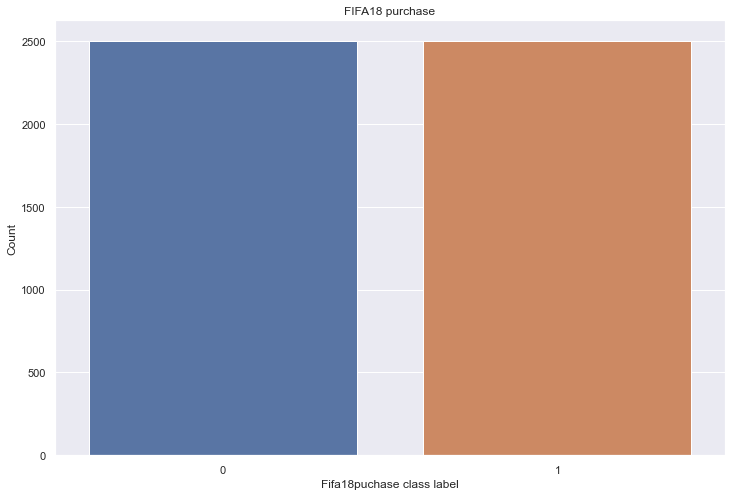

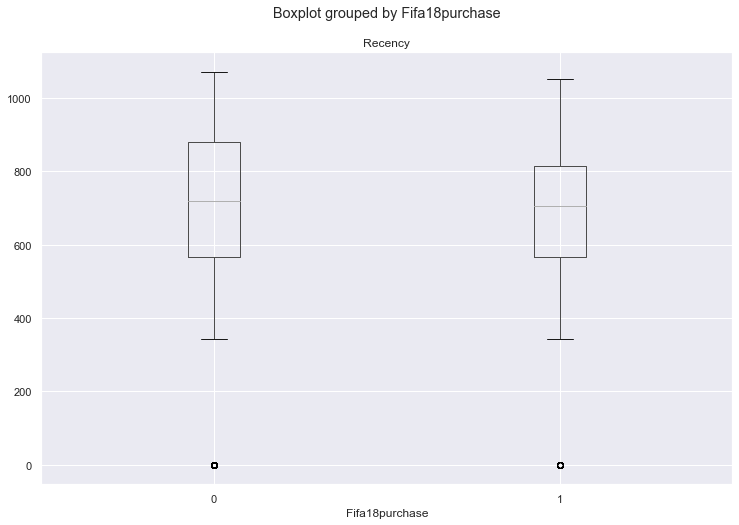

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x="Fifa18purchase", data=a)
ax.set(xlabel='Fifa18puchase class label', ylabel='Count')
ax.set_title("FIFA18 purchase")
a.boxplot(column='Recency', by = 'Fifa18purchase') 

**Histogram distribution of the target variable and box plot of the recency plot with target variable.
From the above plot the values of target distribution are equally distributed.**

<AxesSubplot:>

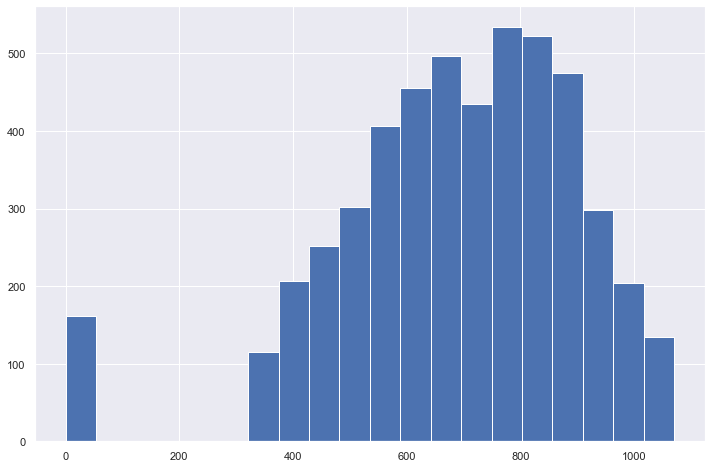

In [9]:
#Recency plot.
a['Recency'].hist(bins=20)

 **From the plot we can see that most of the puchases as within the required timeframe.**

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


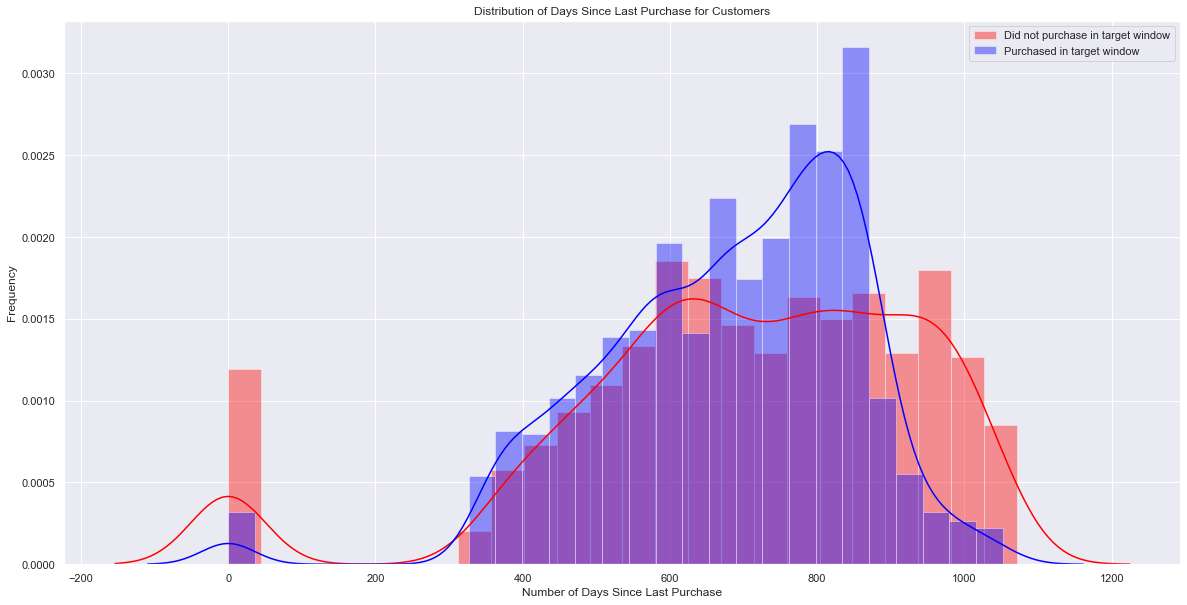

In [10]:
#Code for recency plot.
plt.figure(figsize = (20, 10))
sns.distplot(a[a['Fifa18purchase']==0]['Recency'], color = 'red', label='Did not purchase in target window')
sns.distplot(a[a['Fifa18purchase']==1]['Recency'], color = 'blue', label='Purchased in target window')
plt.ylabel('Frequency')
plt.xlabel('Number of Days Since Last Purchase')
plt.title('Distribution of Days Since Last Purchase for Customers')
plt.legend()
plt.show()

**The box plot above shows the FIFA 18 purchases were made mostly in the target windows with the values decreasing as the number 
of the recency value decreases**

<AxesSubplot:title={'center':'ShooterMoney'}, xlabel='Fifa18purchase'>

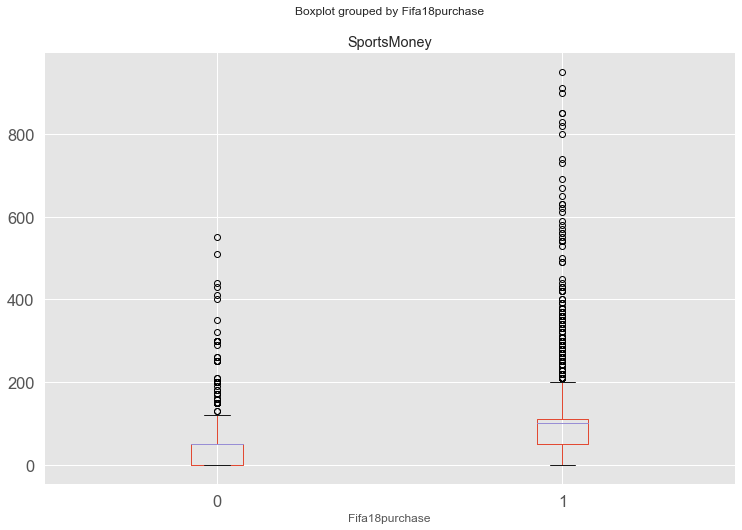

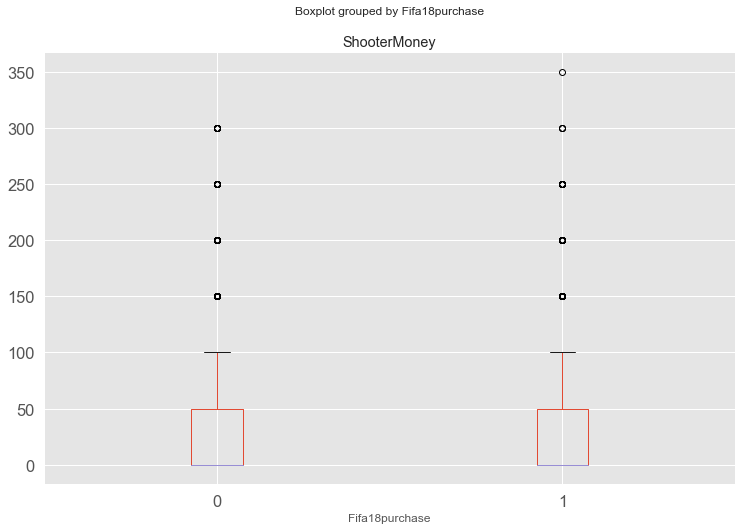

In [62]:
a.boxplot(column='SportsMoney', by = 'Fifa18purchase')
a.boxplot(column='ShooterMoney', by = 'Fifa18purchase')


**From the boxplot we can see that users who spend around (50-900 units) on buying sports genre games brought FIFA18.
Similarly users who spend (25-350 units) on buying shooting genre games brought FIFA18.**

<AxesSubplot:xlabel='Recency', ylabel='SportsMoney'>

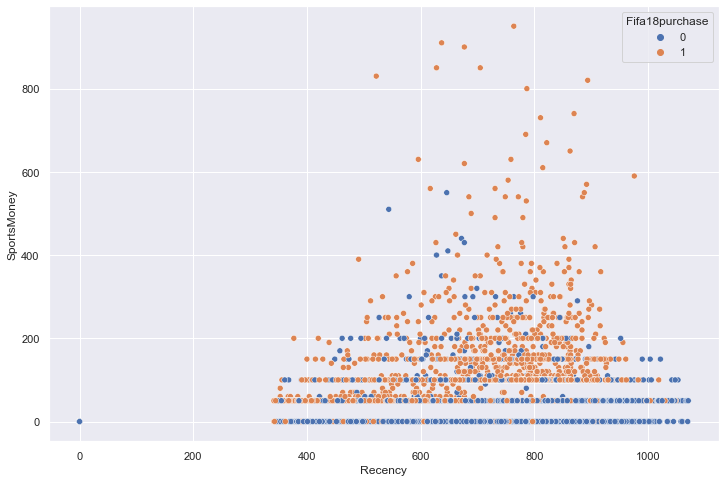

In [86]:
sns.scatterplot(data=a, x="Recency", y="SportsMoney", hue="Fifa18purchase")


**The scatterplot above shows that most of the purchases of fifa18 were made in the target window and most of them being in range of 100-300 units range of the customers who spend buying sports genre games.**

<AxesSubplot:xlabel='Recency', ylabel='FightMoney'>

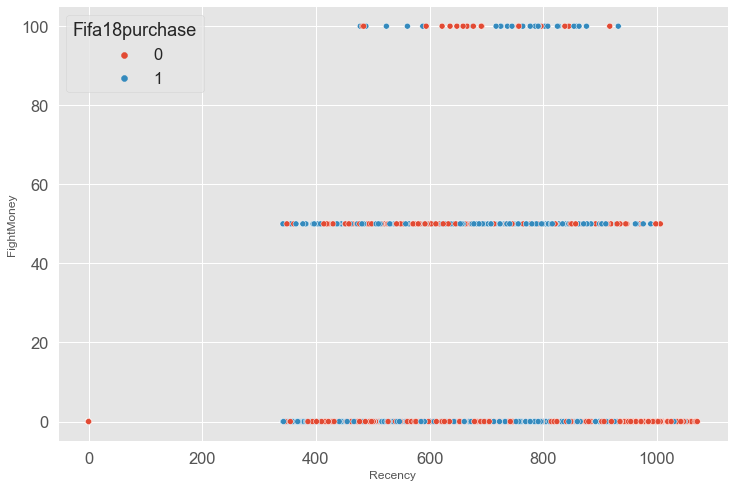

In [76]:
sns.scatterplot(data=a, x="Recency", y="FightMoney", hue="Fifa18purchase")

**The scatterplot above shows that most of the purchases of fifa18 were made in the target window and most of them being in range of 50 units of the customers who spend buying fighting genre games.**

<AxesSubplot:xlabel='Recency', ylabel='ShooterMoney'>

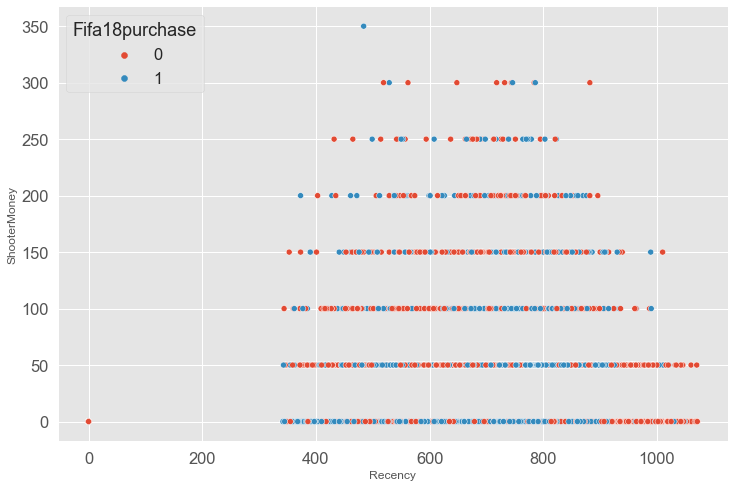

In [72]:
sns.scatterplot(data=a, x="Recency", y="ShooterMoney", hue="Fifa18purchase")

**The scatterplot above shows that most of the purchases of fifa18 were made in the target window and most of them being in range of 0-250 units of the customers who spend buying shooting genre games.**

<AxesSubplot:xlabel='Recency', ylabel='ActionMoney'>

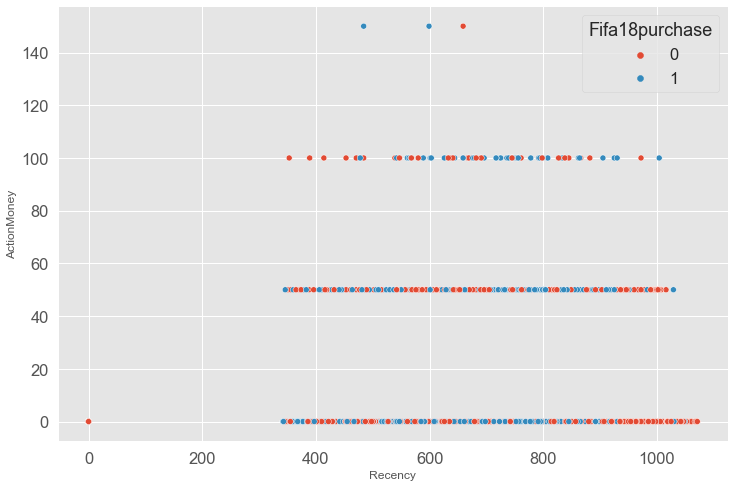

In [73]:
sns.scatterplot(data=a, x="Recency", y="ActionMoney", hue="Fifa18purchase")

**The scatterplot shows that most of the purchases of fifa18 were made in the target window and most of them being in range of 0-100 units of the customers who spend buying action genre games.**

<AxesSubplot:xlabel='ShooterFreq', ylabel='ShooterMoney'>

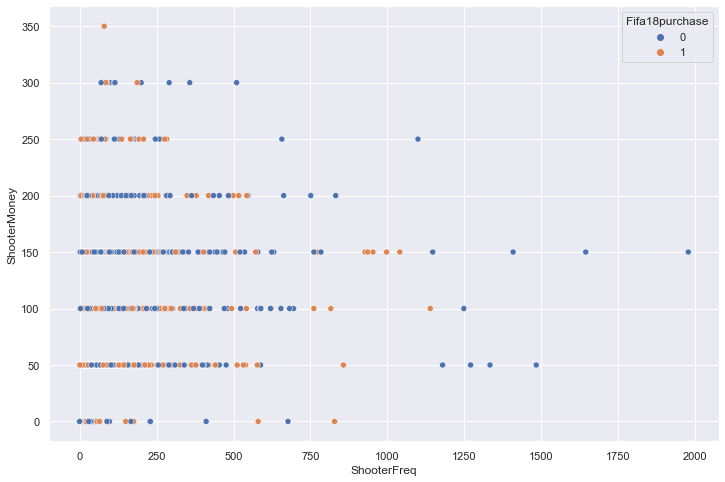

In [87]:
sns.scatterplot(data=a, x="ShooterFreq", y="ShooterMoney", hue="Fifa18purchase")

**The scatterplot shows most of the users who buy shooter games(100-200) and have mid frequency between (200-500) wont buy fifa18.**

<AxesSubplot:title={'center':'SportsFreq'}, xlabel='Fifa18purchase'>

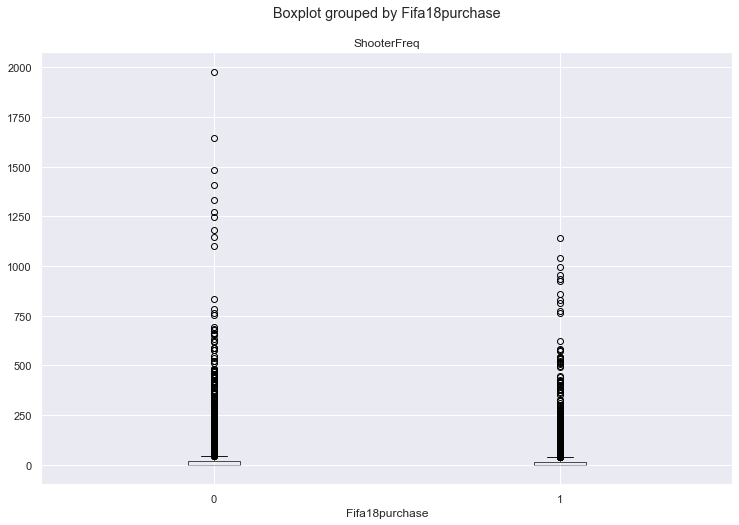

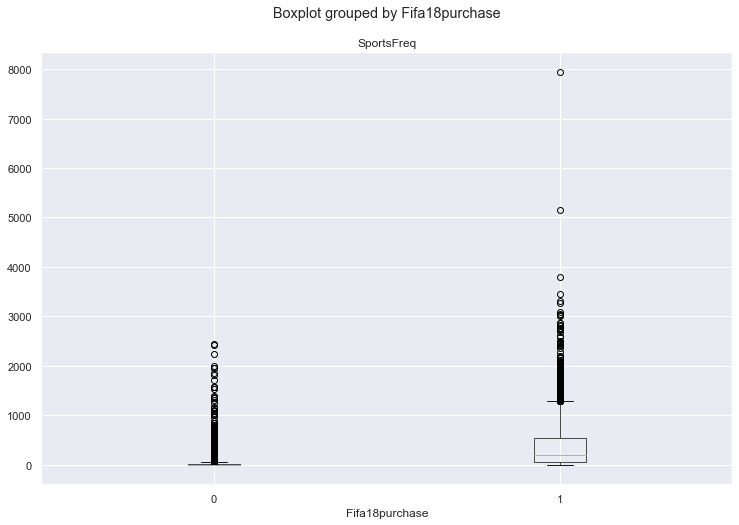

In [14]:
a.boxplot(column='ShooterFreq', by = 'Fifa18purchase')
a.boxplot(column='SportsFreq', by = 'Fifa18purchase')

**The boxplot of the frequency(logins) shows that logins in range between (50-1250) of shooter genre and between (50-8000) for sports genre games purchased fifa18.**

<AxesSubplot:title={'center':'FightFreq'}, xlabel='Fifa18purchase'>

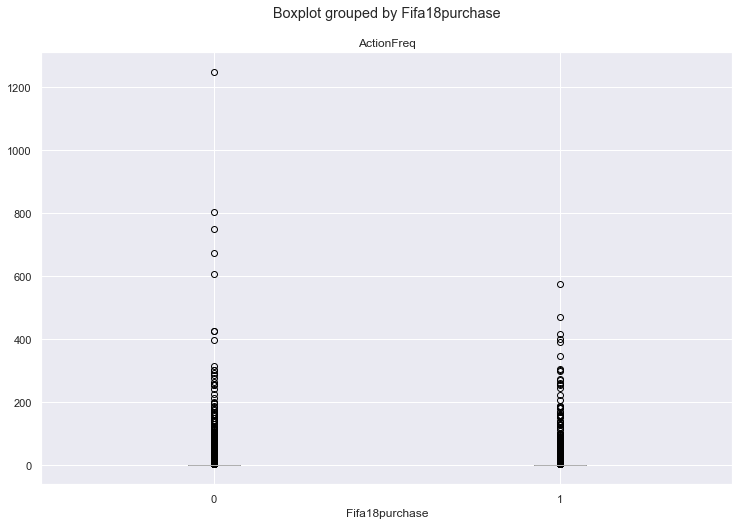

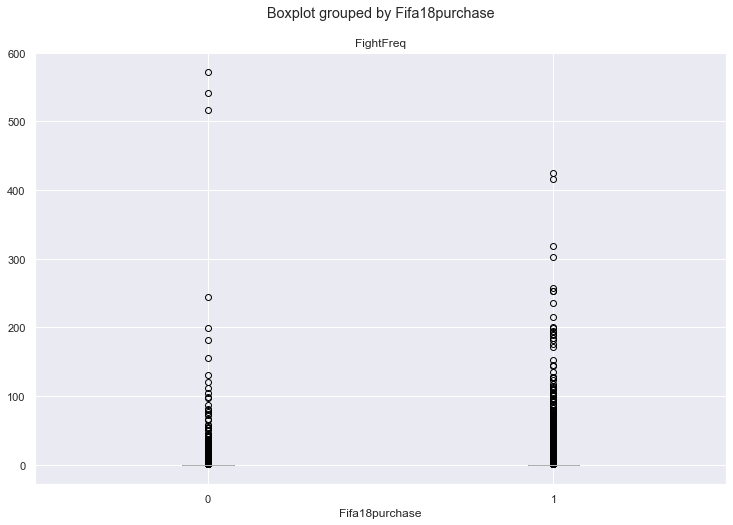

In [11]:
a.boxplot(column='ActionFreq', by = 'Fifa18purchase')
a.boxplot(column='FightFreq', by = 'Fifa18purchase')

**The boxplot of the frequency(logins) shows that logins in range between (0-600) of action genre and between (0-400) for fight genre games purchased fifa18.**

In [16]:
#Seperating 
df2 = a.loc[:, ['id','Fifa18purchase']]
df2 = a.set_index('id')
df2.head()

,ShooterFreq,SportsFreq,ActionFreq,FightFreq,OtherRoleFreq,ActionMoney,FightMoney,SportsMoney,ShooterMoney,OtherRoleMoney,Recency,Fifa18purchase
id,,,,,,,,,,,,
0005f889da556e88fb52f4a38d9fd78892121254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,520.0,0
00076883422376007974b13789be3174a102db30,0.0,2.0,1.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,705.0,0
000f0d7eda6adffdca585f04fb200893fc87e81f,74.0,0.0,35.0,0.0,12.0,0.0,0.0,0.0,150.0,0.0,391.0,1
0025af253aa0ca62b48b0b934677fc8bc49a66c5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
00304c69684e1248264e07025fa237f5726eb76c,0.0,6.0,73.0,0.0,0.0,100.0,0.0,50.0,50.0,0.0,589.0,1


In [17]:
df2.dtypes

ShooterFreq       float64
SportsFreq        float64
ActionFreq        float64
FightFreq         float64
OtherRoleFreq     float64
ActionMoney       float64
FightMoney        float64
SportsMoney       float64
ShooterMoney      float64
OtherRoleMoney    float64
Recency           float64
Fifa18purchase      int64
dtype: object

In [18]:
#Checking multicollinearity using VIF.The value of vif is between the range 1 to 3 ,so we wont remove any features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
X = df2.iloc[:,:-1]
calc_vif(X)


,variables,VIF
0,ShooterFreq,1.359712
1,SportsFreq,1.910412
2,ActionFreq,1.179152
3,FightFreq,1.310246
4,OtherRoleFreq,1.223357
5,ActionMoney,1.355526
6,FightMoney,1.538721
7,SportsMoney,2.803361
8,ShooterMoney,2.147444
9,OtherRoleMoney,1.395063


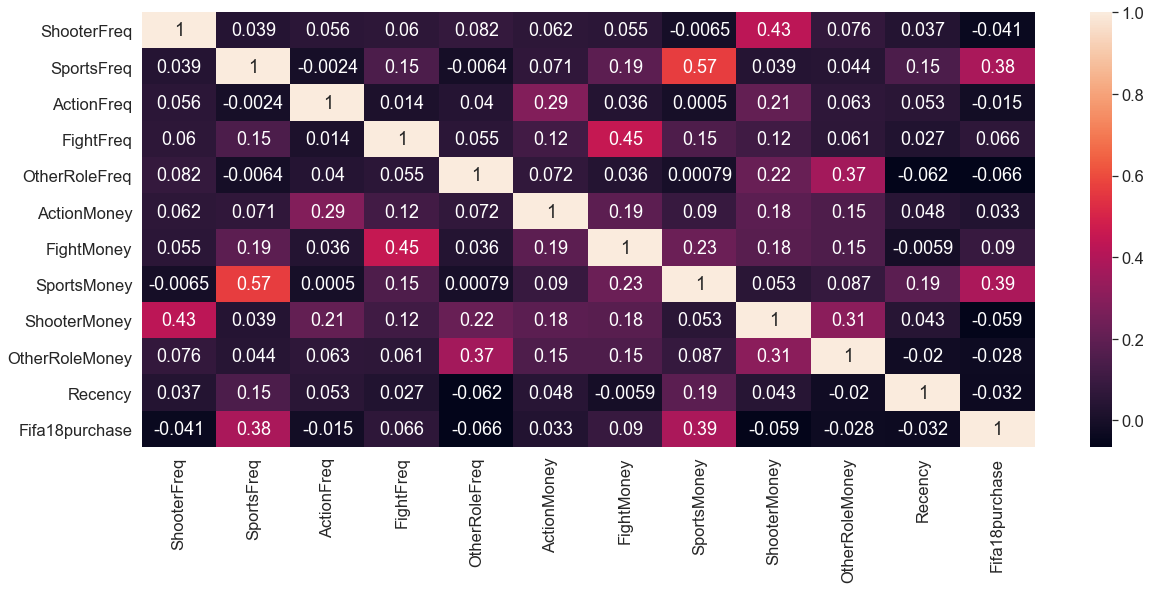

In [22]:
#correlation plot
import seaborn as sns
plt.figure(figsize = (20, 8))
features_corr = df2.corr()
sns.heatmap(features_corr, annot = True)
plt.show()

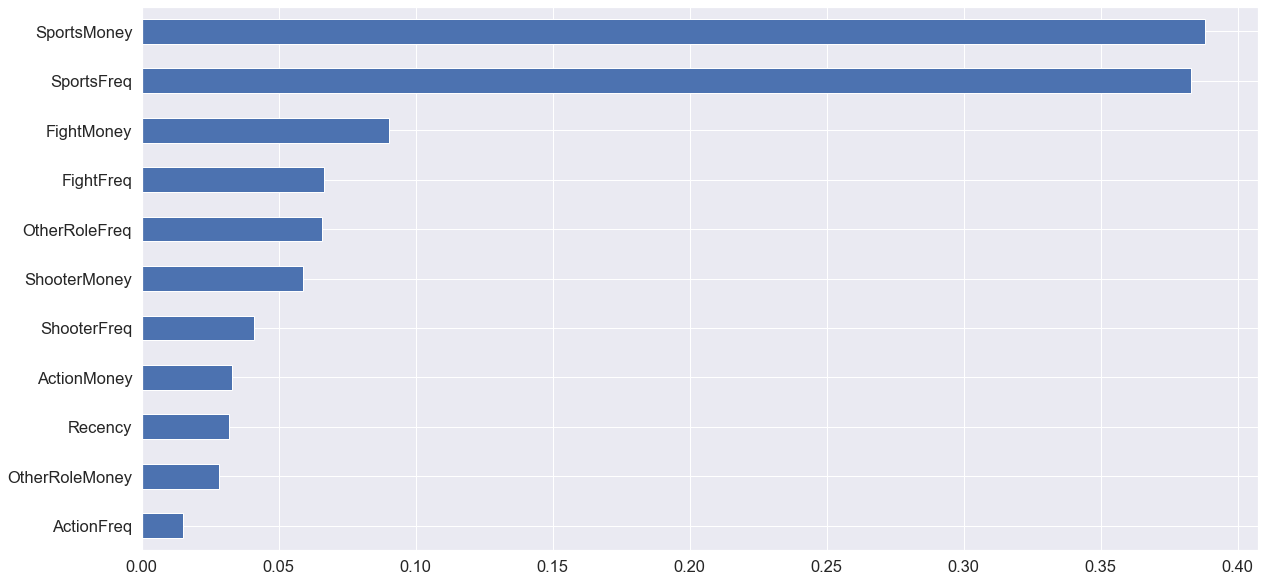

In [23]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
(abs(features_corr)
 .Fifa18purchase
 .drop('Fifa18purchase')
 .sort_values()
 .plot
 .barh())
plt.show()

**Sports Money, Sports Freq, Fight Money are the most important variable in dataset and have high correlation**

In [24]:
df2.head()

,ShooterFreq,SportsFreq,ActionFreq,FightFreq,OtherRoleFreq,ActionMoney,FightMoney,SportsMoney,ShooterMoney,OtherRoleMoney,Recency,Fifa18purchase
id,,,,,,,,,,,,
0005f889da556e88fb52f4a38d9fd78892121254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,520.0,0
00076883422376007974b13789be3174a102db30,0.0,2.0,1.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,705.0,0
000f0d7eda6adffdca585f04fb200893fc87e81f,74.0,0.0,35.0,0.0,12.0,0.0,0.0,0.0,150.0,0.0,391.0,1
0025af253aa0ca62b48b0b934677fc8bc49a66c5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
00304c69684e1248264e07025fa237f5726eb76c,0.0,6.0,73.0,0.0,0.0,100.0,0.0,50.0,50.0,0.0,589.0,1


# Machine Learning Model Development and Evaluation¶
Machine learning classification models using logistic regression, XGBoost, random forest and Gaussian Naive Bayes. Logistic regression serves as a baseline model for comparison. Models are evaluated using cross-validation. 75% of the training data is set aside to train the model and 25% is allocated to the test set.

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from plot_metric.functions import BinaryClassification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from scipy.stats import randint
import matplotlib.pyplot as plt

In [26]:
X = df2.drop('Fifa18purchase', axis=1)
y = df2['Fifa18purchase']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.25, random_state=99)

In [27]:
# Logistic Regression - Baseline Model
logreg = LogisticRegression(random_state=0, class_weight='balanced')
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

print("Logistic Regression - Testing Accuracy:", (round(accuracy_score(y_test, logreg_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test, logreg_pred))

Logistic Regression - Testing Accuracy: 0.78


[[509 128]
 [146 467]]


              precision    recall  f1-score   support

           0       0.78      0.80      0.79       637
           1       0.78      0.76      0.77       613

    accuracy                           0.78      1250
   macro avg       0.78      0.78      0.78      1250
weighted avg       0.78      0.78      0.78      1250



AUC Score: 0.7804425823535588


In [28]:
# XGBoost
weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb = XGBClassifier(silent=True,
                      random_state=1, 
                      scale_pos_weight=weights,
                      learning_rate=0.03,  
                      colsample_bytree = 0.8,
                      subsample = 0.7,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.25,
                      min_child_weight = 2,
                      max_depth=5,
                      n_jobs = -1,
                      gamma=1)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost - Testing Accuracy:", (round(accuracy_score(y_test, xgb_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, xgb_pred))
print('\n')
print(classification_report(y_test, xgb_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test,xgb_pred))

[13:25:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost - Testing Accuracy: 0.81


[[488 149]
 [ 89 524]]


              precision    recall  f1-score   support

           0       0.85      0.77      0.80       637
           1       0.78      0.85      0.81       613

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250



AUC Score: 0.8104517249238761


<AxesSubplot:>

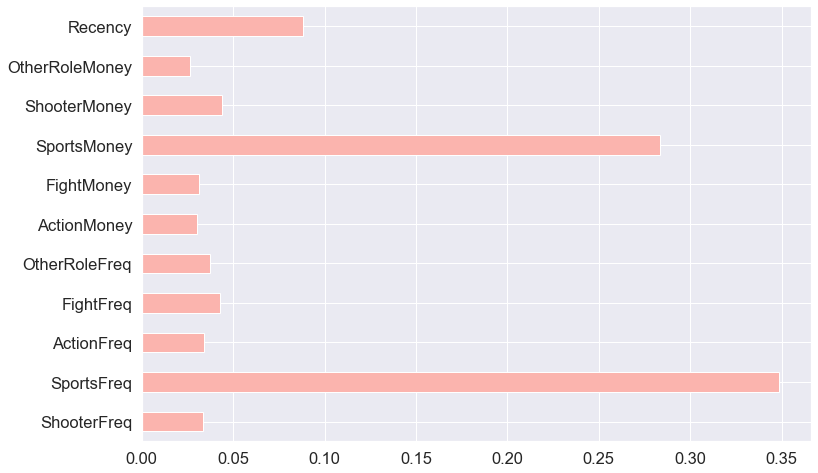

In [29]:
# XGBoost Feature Importance.From the plot it can be seen that money spent on sports and freq of logins followed by
#recent purchase days were important variables.
(pd.Series(xgb.feature_importances_, index=X.columns)
   .plot(kind='barh', colormap = 'Pastel1'))

In [31]:
# XGboost - Hyperparameter Tuning with Randomized Search CV 
weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb = XGBClassifier(random_state=1, scale_pos_weight = weights, n_jobs = -1, objective = 'binary:logistic')
xgb_params = {'n_estimators': randint(100, 300),
              'learning_rate': uniform(0.01, 0.05),
              'subsample': uniform(0.5, 1.0),
              'max_depth': [4, 5, 6, 7, 8],
              'colsample_bytree': uniform(0.5, 1.0),
              'min_child_weight': [1, 2, 3],
              'gamma': [0.3, 0.5, 0.7, 1]
             }

xgb_rs = RandomizedSearchCV(xgb,xgb_params,cv=10,n_jobs=-1, n_iter = 300, scoring = 'f1', error_score = 0, verbose = 3)
xgb_rs.fit(X_train, y_train)
print("XGB Best Parameters:", xgb_rs.best_params_)
print("XGB Best Score:", xgb_rs.best_score_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1188 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1628 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2692 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.0min finished


XGB Best Parameters: {'colsample_bytree': 0.9583535706601085, 'gamma': 0.3, 'learning_rate': 0.02774028035863354, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 138, 'subsample': 0.589403182845037}
XGB Best Score: 0.8106482082909414


In [32]:
xgb_pred = xgb_rs.predict(X_test)
print("XGBoost - Testing Accuracy:", (round(accuracy_score(y_test, xgb_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, xgb_pred))
print('\n')
print(classification_report(y_test, xgb_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test,xgb_pred))

XGBoost - Testing Accuracy: 0.81


[[496 141]
 [ 93 520]]


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       637
           1       0.79      0.85      0.82       613

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250



AUC Score: 0.8134685170341195


In [33]:
# Random Forest 
rfc = RandomForestClassifier(random_state=1,
                             class_weight='balanced',
                             n_jobs = -1,
                             n_estimators=344,
                             max_depth=5,
                             min_samples_split=2,
                             min_samples_leaf=3,
                             max_features='auto',
                             criterion='gini'
                             )

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
                
print("Random Forest - Testing Accuracy:", (round(accuracy_score(y_test, rfc_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test,rfc_pred))

Random Forest - Testing Accuracy: 0.81


[[501 136]
 [106 507]]


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       637
           1       0.79      0.83      0.81       613

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250



AUC Score: 0.8067895749088942


<AxesSubplot:>

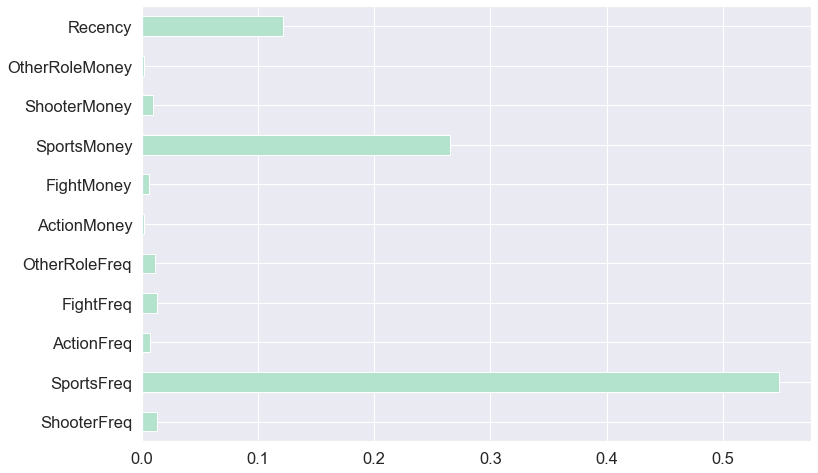

In [34]:
# Random Forest Feature Importance
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh', colormap = 'Pastel2'))

**Recency, sports money, sports freq are the most importany features in random forest algo.**

In [82]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)


In [36]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_rus,y_train_rus)
gnb_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes - Testing Accuracy:", (round(accuracy_score(y_test, logreg_pred.round(0)), 2)))
print('\n')
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))
print('\n')
print("AUC Score:", roc_auc_score(y_test, logreg_pred))

Gaussian Naive Bayes - Testing Accuracy: 0.78


[[509 128]
 [146 467]]


              precision    recall  f1-score   support

           0       0.78      0.80      0.79       637
           1       0.78      0.76      0.77       613

    accuracy                           0.78      1250
   macro avg       0.78      0.78      0.78      1250
weighted avg       0.78      0.78      0.78      1250



AUC Score: 0.7804425823535588


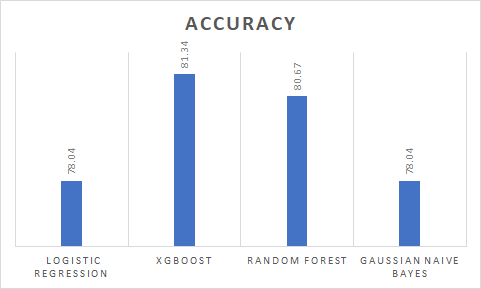


**The histogram shows the accuracy of various models,from that we chose xgboost becasue of its accuracy**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)
X_train_data = X_train
X_test_data = X_test
weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb = XGBClassifier(silent=True,
                      random_state=1, 
                      scale_pos_weight=weights,
                      learning_rate=0.03,  
                      colsample_bytree = 0.8,
                      subsample = 0.7,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.25,
                      min_child_weight = 2,
                      max_depth=5,
                      n_jobs = -1,
                      gamma=1)
xgb.fit(X_train_data, y_train)
xgb_pred = xgb.predict_proba(X_test_data)
df_propensity1 = pd.DataFrame(data=X_test)
df_propensity1['Purchase Probability'] = xgb_pred[:,1]

[13:30:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [47]:
xgb_pred_train = xgb.predict_proba(X_train_data)
df_propensity2 = pd.DataFrame(data=X_train)
df_propensity2['Purchase Probability'] = xgb_pred_train[:,1]

In [48]:
df_propensity = pd.concat([df_propensity1,df_propensity2],axis='rows')
df_propensity.shape

(5000, 12)

In [49]:
df_propensity.sort_values(by=['Purchase Probability'], ascending=False).head()

,ShooterFreq,SportsFreq,ActionFreq,FightFreq,OtherRoleFreq,ActionMoney,FightMoney,SportsMoney,ShooterMoney,OtherRoleMoney,Recency,Purchase Probability
id,,,,,,,,,,,,
7a2bd26b1cb67d345a627ad3f83f48aa74829fb3,54.0,690.0,0.0,302.0,0.0,0.0,50.0,210.0,100.0,0.0,811.0,0.939891
d3fe76925b98057dee7bafa50fdc93052a6a16c6,36.0,1030.0,0.0,191.0,0.0,0.0,50.0,530.0,150.0,0.0,786.0,0.939807
744888fbd5d8f3d83f42329349ca6ced72a895a7,0.0,1178.0,0.0,59.0,0.0,0.0,50.0,610.0,50.0,0.0,815.0,0.934620
c62182ad9c32d8311f4e03d05458f965efc8e78a,0.0,892.0,0.0,0.0,0.0,0.0,0.0,260.0,0.0,0.0,861.0,0.932819
64ec7ca4f3e96df97a458a981e6321593b994535,0.0,706.0,0.0,425.0,0.0,0.0,50.0,360.0,0.0,0.0,816.0,0.932476


In [50]:
df_propensity.sort_values(by=['Purchase Probability'], ascending=True).head()

,ShooterFreq,SportsFreq,ActionFreq,FightFreq,OtherRoleFreq,ActionMoney,FightMoney,SportsMoney,ShooterMoney,OtherRoleMoney,Recency,Purchase Probability
id,,,,,,,,,,,,
72a20f8cd9e2ad7209a618f7f1d4ce8636f4cf17,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,956.0,0.065309
f93024f676f4b2556236bd53bf776b2d667be862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,953.0,0.065309
486fde5a5bbafcd5c6f5200faa6b2302ffe023d8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,957.0,0.065309
11df85fe11f1510e8a1b4edbc3b0c046b57d5d4d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,956.0,0.065309
c6a12466c15d4ba25fcb0ed6528aac42161d3e10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,950.0,0.065309


In [51]:
propensity_90 = df_propensity[df_propensity['Purchase Probability'] >= 0.9]
propensity_80 = df_propensity[(df_propensity['Purchase Probability'] >= 0.8) & (df_propensity['Purchase Probability'] < 0.9) ]
propensity_70 = df_propensity[(df_propensity['Purchase Probability'] >= 0.7) & (df_propensity['Purchase Probability'] < 0.8) ]
propensity_60 = df_propensity[(df_propensity['Purchase Probability'] >= 0.6) & (df_propensity['Purchase Probability'] < 0.7) ]
propensity_50 = df_propensity[(df_propensity['Purchase Probability'] >= 0.5) & (df_propensity['Purchase Probability'] < 0.6) ]
propensity_40 = df_propensity[(df_propensity['Purchase Probability'] >= 0.4) & (df_propensity['Purchase Probability'] < 0.5) ]
propensity_30 = df_propensity[(df_propensity['Purchase Probability'] >= 0.3) & (df_propensity['Purchase Probability'] < 0.4) ]
propensity_20 = df_propensity[(df_propensity['Purchase Probability'] >= 0.2) & (df_propensity['Purchase Probability'] < 0.3) ]
propensity_10 = df_propensity[(df_propensity['Purchase Probability'] >= 0.1) & (df_propensity['Purchase Probability'] < 0.2) ]
propensity_0 = df_propensity[(df_propensity['Purchase Probability'] >= 0) & (df_propensity['Purchase Probability'] < 0.1) ]

In [52]:
propensity_90['Purchase Probability'] = "90 - 95%"
propensity_80['Purchase Probability'] = "80 - 89%"
propensity_70['Purchase Probability'] = "70 - 79%"
propensity_60['Purchase Probability'] = "60 - 69%"
propensity_50['Purchase Probability'] = "50 - 59%"
propensity_40['Purchase Probability'] = "40 - 49%"
propensity_30['Purchase Probability'] = "30 - 39%"
propensity_20['Purchase Probability'] = "20 - 29%"
propensity_10['Purchase Probability'] = "10 - 19%"
propensity_0['Purchase Probability']  = "7 - 9%"

<ipython-input-52-67ed5e642311>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-67ed5e642311>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-67ed5e642311>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-67ed5e6

In [53]:
propensity_dfs = [propensity_90, propensity_80, propensity_70, propensity_60, propensity_50, propensity_40, propensity_30, propensity_20, propensity_10, propensity_0]
purchase_prob = pd.concat(propensity_dfs)
purchase_prob['Purchase Probability'].value_counts()

10 - 19%    1008
80 - 89%     906
70 - 79%     824
7 - 9%       449
20 - 29%     364
60 - 69%     353
50 - 59%     332
30 - 39%     267
90 - 95%     252
40 - 49%     245
Name: Purchase Probability, dtype: int64

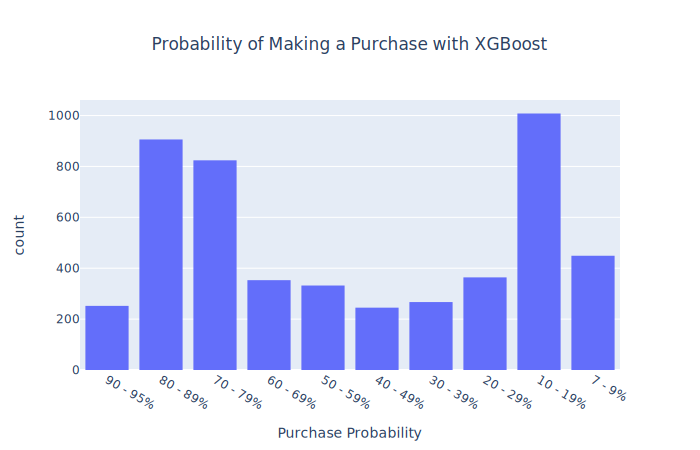

In [54]:
import plotly_express as px 
fig = px.histogram(data_frame=purchase_prob,
       x='Purchase Probability',
       template='plotly',
       title='Probability of Making a Purchase with XGBoost'     
      ).update(layout=dict(title=dict(x=0.5)))
fig.show("svg")

**Insights and Recommendations: This chart helps us focus on decile groups that have the highest chance of making a purchase. The customers in the group on the far left are few in number but have the highest probability of making a purchase. In contrast, the group on the far right has the lowest probability of making a purchase.**

**There are two ways we can apply marketing strategies to increase the likelihood that customers will make a purchase. If resources and funding are not an issue, we can give our marketing incentives to customers in the 70 – 79%, 60 - 69%, and 50 - 59% decile groups to increase the likelihood that they will make a purchase. Customers in the 90 – 95% and 80 - 89% decile groups already have a very high probability of making a purchase. Therefore, it may not be necessary to give them an incentive.The only time we should give them an incentive is when they don't make a purchase. If resources are limited, we should only give marketing incentives to customers in the decile groups between 70 - 95% if they don't make a purchase.**

--------------------------------------------------------------------------------------------------------------------------------

1.Using the available data, build a predictive model to predict the probability that a player will purchase FIFA 18.

**ANSWER:   From the above, we built a XGBOOST model with accuracy of 81.34 and a histogram chart with probability count is in the ln54.**

--------------------------------------------------------------------------------------------------------------------------------

2.How would you evaluate the performance of the model? Is there a way to determine whether the performance is acceptable or not?

**ANSWER:The performance of the model can be evaluated from Precision, Recall and Specificity,ROC curve which is a graphical summary of the overall performance of the model. The auc score of the xgboost model is 0.813 which is pretty much acceptable.**

--------------------------------------------------------------------------------------------------------------------------------

3.What do you suggest as next steps to improve the performance of the model?

**ANSWER:1)Add more data. 
2)More feature engineering.
3)More feature selection.
4)Used more multiple algorithms.
5)More algorithm tuning.
6)Used ensemble methods like boosting and bagging.**

--------------------------------------------------------------------------------------------------------------------------------

4.What are the most interesting insights that you can extract from the dataset used to build the model?

**ANSWER:There were lot of insights that were extracted.However some important of them were**

**=Most of the purchases of fifa18 were made in the target window.With the purchases decreasing as the target window days increase**


**=Customers who spend Monetary value between (0-900) for buying sports genre games ,(0-350) for buying shooter genre games,(0-100)for buying fighting genre games purchased fifa 18**

**=Customers who spend login/playing in range (0-8000) of sports genre,(0-1100) of shooting genre,(0-400) of fighting genre,(0-600)action genre games purchased fifa 18**

**=Sports Money, Sports Freq, Fight Money were the most important variables in deciding the purchase**



--------------------------------------------------------------------------------------------------------------------------------

5.Which players would you recommend being included in the target audience for the pre-launch campaign and why?

**ANSWER:From the probability model we can give our marketing incentives to:**

**=Customers in the 70 – 79%, 60 - 69%, and 50 - 59% decile groups to increase the likelihood that they will make a purchase.**

**=Customers who have spend playing/logins shooting/sports/action/fighting between (0-500) and monetary values in general between (0-400) making purchases of any genre.**



--------------------------------------------------------------------------------------------------------------------------------

6.Fast forward to December 2018, we want to reuse the results of the model executed in August 2018 (without re-running it) for a holiday campaign around Christmas. Would you change your recommendation? If so, why?

**ANSWER: Our model is effective in every general case, but if we want to gain more accurate insights we can model the recency value based on month/quarter to get more accurate results during the Christmas.**